<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1602115200&v=beta&t=XHE3KbzKbKy54WYDTfq7VFNUPfNjoIOrjBw6dzFPTfA" width="1000"></center>

# SDC Certified Program in Python for Data Science

## Tema 10. Otras técnicas de reducción de dimensionalidad y tratamiento de outliers


### Prof. Manuel Sigüeñas, M.Sc.(c) 

[Perfil](https://socialdata-peru.com/learning/teacher2.php)

### Prof. Lenguajes de Programación para Ciencia de Datos / Agile Data Scientists / SCRUMStudy Certified Trainer


[msiguenas@socialdata-peru.com](msiguenas@socialdata-peru.com)}

<a id='beginning'></a>

Plan para esta sección:

1. [Análisis factorial](#part1) 
2. [Outliers](#part2) 

In [1]:
from IPython.display import Image
%matplotlib inline

<a id='part1'></a>
## Análisis factorial

In [1]:
import pandas as pd

url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df_wine = pd.read_csv(url,header=None)

# Si el conjunto de datos de Wine no está disponible temporalmente en el repositorio de Machine Learning de la UCI, 
#anule los comentarios de la siguiente línea de código para cargar el conjunto de datos desde una ruta local:

#df_wine = pd.read_csv('D:/Python/1. Nivel I/9/data/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Dividir la data en data de entrenamiento (70%) y prueba (30%)

In [2]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, #predictores
                     y, #target
                     test_size=0.3, #tamaño de los datos de testeo 
                     stratify=y, # variable de estratificación
                     random_state=0) #semilla

Estandarizar los datos

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

El análisis factorial es otra técnica que podemos usar para reducir la dimensionalidad. Sin embargo, el análisis factorial hace suposiciones. La suposición básica es que hay características implícitas responsables de las características del conjunto de datos.

Esta receta se reducirá a las características explícitas de nuestras muestras en un intento de comprender las variables dependientes.

Se supone que las observaciones son causadas por una transformación lineal del ruido gaussiano con media cero y covarianza unitaria. El ruido también es cero y tiene una matriz de covarianza diagonal arbitraria.

Si restringiéramos aún más el modelo, suponiendo que el ruido gaussiano sea incluso isotrópico (todas las entradas diagonales son iguales) obtendríamos PPCA.

FactorAnalysis realiza una estimación de máxima verosimilitud de la llamada matriz de carga, la transformación de las variables latentes a las observadas, utilizando la maximización de expectativas (expectation-maximization - EM).

In [4]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis

In [5]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
X,y=iris.data, iris.target

In [7]:
factor = FactorAnalysis(n_components=4, 
                        random_state=2020).fit(X)

In [8]:
factor.components_ 

array([[ 0.70698856, -0.15800499,  1.65423609,  0.70084996],
       [ 0.115161  ,  0.15963548, -0.04432109, -0.01403039],
       [-0.        ,  0.        ,  0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        , -0.        ]])

##### Buscando factores ocultos

In [9]:
from sklearn.decomposition import FactorAnalysis

In [10]:
fa = FactorAnalysis()

In [11]:
X_train_fa = fa.fit(X_train_std)

Después de cargar los datos y haber almacenado todas las características predictivas, se inicializa la clase FactorAnalysis. Luego se ajustan los datos. Puede explorar los resultados observando el atributo de los componentes, que regresa a una matriz de medidas de la relación entre los factores recién creados, colocados en filas, y las características originales, colocadas en columnas.

En la intersección de cada factor y característica, un número positivo indica que existe una proporción positiva entre los dos; un número negativo, en cambio, señala que divergen y uno es lo contrario del otro.

In [12]:
X_train_fa.components_

array([[-2.68398795e-01,  4.78267922e-01, -8.23434764e-02,
         3.89619362e-01, -2.80493395e-01, -8.48027518e-01,
        -8.96695560e-01,  6.10593544e-01, -6.34124632e-01,
         1.77666823e-01, -6.72551278e-01, -7.98880917e-01,
        -5.95473936e-01],
       [ 7.01476029e-01,  1.78412796e-01,  2.63041773e-01,
        -2.28848343e-01,  3.51196978e-01,  7.72534972e-02,
        -1.90598515e-02,  1.00562271e-01,  2.22408351e-02,
         7.52555988e-01, -2.59878489e-01, -3.41463147e-01,
         5.52834465e-01],
       [-7.61801772e-02,  1.62225043e-01,  6.55477450e-01,
         6.00167810e-01,  1.51567033e-01,  1.33712377e-01,
         9.11337260e-02,  1.81671002e-01,  2.64162505e-02,
         2.06370030e-02, -3.92249922e-02,  7.33103165e-02,
        -6.73110647e-02],
       [-4.73323851e-02,  2.70658477e-01, -1.34998350e-01,
        -1.92209263e-02, -1.63701363e-01,  1.18296185e-01,
         7.84306206e-02, -4.09230845e-02,  2.85458651e-01,
         1.14959202e-01, -2.98859200e

En la prueba en el conjunto de datos, por ejemplo, los factores resultantes deben ser un máximo de 6, no 13, porque los seis factores tienen conexiones significativas con las características originales. Puede usar estos seis factores en su proyecto porque reflejan un objetivo importante que solo se insinuó.

In [13]:
import pandas as pd

transformer = FactorAnalysis(n_components=6, 
                             random_state=0)
X_transformed = transformer.fit_transform(X_train_std)

pd.DataFrame(X_transformed)

,0,1,2,3,4,5
0,0.926144,0.438051,-0.298116,-0.832909,0.049138,1.303291
1,-0.827139,1.044580,0.840598,-1.669089,-0.187766,-0.579737
2,-1.157387,0.913191,0.678383,-0.221260,0.421297,-0.492270
3,-0.618607,0.510692,0.416441,-0.365276,1.150223,-0.062673
4,1.562971,0.171224,-0.429065,-0.732824,-1.136277,-1.038941
...,...,...,...,...,...,...
119,0.168819,-1.069176,1.105488,-1.503946,0.826129,-0.275657
120,1.187078,0.956189,-0.006620,0.383864,0.402196,0.104022
121,1.780045,0.625144,-1.083164,0.163383,0.787515,1.678909
122,-0.708596,-1.154110,0.109129,1.348483,0.856484,-0.528866


In [14]:
import pandas as pd

transformer = FactorAnalysis(n_components=6, #n componentes
                             random_state=0) #semilla
#generamos el objeto transformer de tipo función
X_transformed = transformer.fit_transform(X_train_std) #fit_transform aplica a los datos de 
#entrenamiento
X_transformed = pd.DataFrame(X_transformed)
X_transformed.columns = ['FACT1', 'FACT2', 'FACT3', 'FACT4', 'FACT5', 'FACT6']
X_transformed.head()

,FACT1,FACT2,FACT3,FACT4,FACT5,FACT6
0,0.926144,0.438051,-0.298116,-0.832909,0.049138,1.303291
1,-0.827139,1.044580,0.840598,-1.669089,-0.187766,-0.579737
2,-1.157387,0.913191,0.678383,-0.221260,0.421297,-0.492270
3,-0.618607,0.510692,0.416441,-0.365276,1.150223,-0.062673
4,1.562971,0.171224,-0.429065,-0.732824,-1.136277,-1.038941


In [16]:
df_wine_y = pd.DataFrame(y_train)
df_wine_y.columns = ['Class label']
df_wine_y.head()

,Class label
0,3
1,1
2,1
3,1
4,3


##### Nuevo conjunto de datos

In [17]:
    df_wine_rd_fact = pd.concat([X_transformed, df_wine_y], axis=1)
    df_wine_rd_fact.head()

,FACT1,FACT2,FACT3,FACT4,FACT5,FACT6,Class label
0,0.926144,0.438051,-0.298116,-0.832909,0.049138,1.303291,3
1,-0.827139,1.044580,0.840598,-1.669089,-0.187766,-0.579737,1
2,-1.157387,0.913191,0.678383,-0.221260,0.421297,-0.492270,1
3,-0.618607,0.510692,0.416441,-0.365276,1.150223,-0.062673,1
4,1.562971,0.171224,-0.429065,-0.732824,-1.136277,-1.038941,3


<a id='part2'></a>
## Outliers

Un “outlier” es una observación que se desv´ıa tanto de las otras observaciones como para crear la sospecha de que fue generado por un mecanismo diferente

Considerar outliers valores que:

\begin{align*}
\frac{|x−\bar{x}|}{s} > k
\end{align*}

donde k es 2 ó 3 si consideramos normalidad

Considerando el Boxplot (Tukey, 1977), se considera outlier a los valores que caen fuera de este intervalo. 

\begin{align*}
(Q 1 − 3 × IQR, Q 3 + 3 × IQR)
\end{align*}

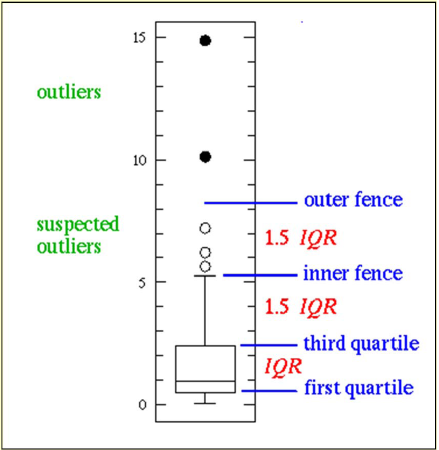

In [15]:
Image(filename='D:/Python/1. Nivel I/9/imagenes/outlier.png', width=400) 

##### ¿De dónde provienen los outliers?

- Error durante la recopilación de datos
- variaciones en nuestros datos

In [18]:
from sklearn.datasets import load_boston #importar data boston
import pandas as pd

In [19]:
boston = load_boston () 
x = boston.data #.data para variables predictoras
y = boston.target #.target para variable objetivo
columnas = boston.feature_names #.feature_names para extraer los nombres
#crear el marco de datos 
boston_df = pd.DataFrame (boston.data) 
boston_df.columns = columnas 
boston_df.head ()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##### Outliers univariados u multivariados

Univariados (un análisis de valores atípicos variables) y multivariados (dos o más análisis de valores atípicos variables). 

##### Herramientas de visualización

##### Boxplot

Para visualizar valores extremos (outliers) univariados se utiliza el boxplot. utilizaremos la columna "DIS" para verificar la presencia de valores atípicos.

In [20]:
import seaborn as sns

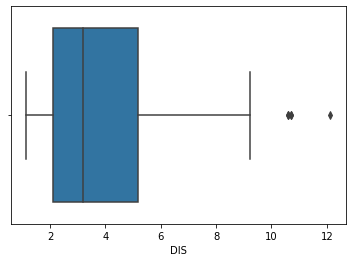

In [21]:
sns.boxplot (x = boston_df ['DIS'])

En la gráfica se muestran tres puntos entre 10 y 12, estos son valores atípicos ya que no están incluidos en el cuadro de otra observación, es decir, no cerca de los cuartiles.

##### Gráfica de dispersión

Gráfica que nos ayudará a detectar valores extremos teniendo en cuenta dos atributos.

In [22]:
import matplotlib.pyplot as plt

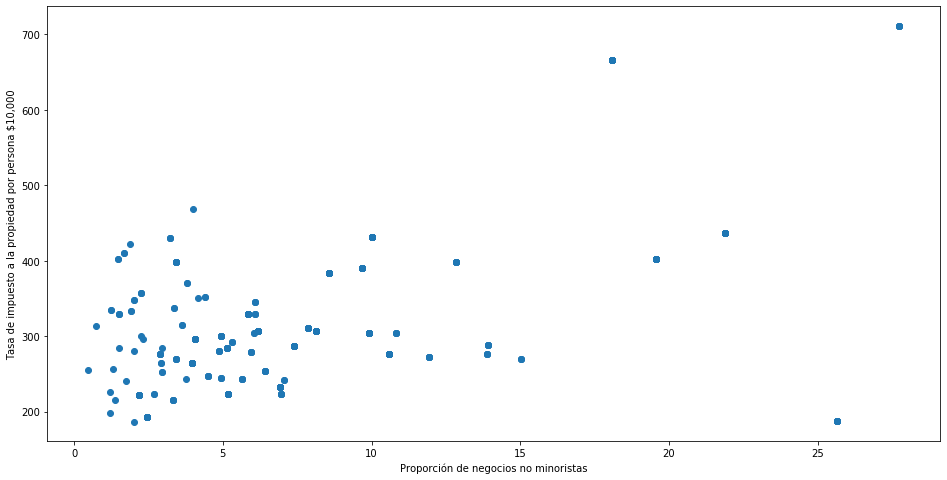

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], 
           boston_df['TAX'])
ax.set_xlabel('Proporción de negocios no minoristas')
ax.set_ylabel('Tasa de impuesto a la propiedad por persona $10,000')
plt.show()

##### z-score

El **z-score** es el número de desviaciones estándar por el cual el valor de una observación o punto de datos está por encima del valor medio de lo que se está observando o midiendo.

El **z-score** es encontrar la distribución de datos donde la media es 0 y la desviación estándar es 1, es decir, la distribución normal.

##### ¿Cómo funciona?

Buscamos puntos de datos que están lejos de cero. Estos puntos de datos que están lejos de cero se tratarán como valores atípicos. En la mayoría de los casos, se usa un umbral de 3 o -3, es decir, si el valor del **z-score** es mayor o menor que 3 o -3 respectivamente, ese punto de datos se identificará como valores atípicos.

In [24]:
from scipy import stats
import numpy as np

In [25]:
z = np.abs(stats.zscore(boston_df)) #valor absoluto de las z-score
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


Se establece el parámeto (umbral) **k** para considerar una observación como outlier

In [26]:
k = 3
print(np.where(z > k))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

Printiamos un ejemplo:

In [31]:
print(z[152][3])

3.668397859712425


##### IQR score

El diagrama de caja usa el método IQR (rango intercuartil) para mostrar datos y valores atípicos (forma de los datos) pero para obtener una lista de valores atípicos identificados, necesitaremos usar la fórmula matemática y recuperar los datos atípicos.

**Nota:** Es una medida de la dispersión similar a la desviación estándar o la varianza, pero es mucho más robusta frente a los valores atípicos

In [32]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


Como ahora tenemos los puntajes de IQR, es hora de obtener valores atípicos: **True**

In [33]:
print((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR)))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

##### Corregir y eliminar valores atípicos

¿Deben eliminarlos o corregirlos?

##### Z-score

Eliminar o filtrar los valores atípicos y obtener los datos limpios. Esto se puede hacer con una sola línea de código, ya que ya hemos calculado el z-score.

In [34]:
boston_df_o = boston_df[(z < 3).all(axis=1)]
boston_df_o.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
len(boston_df_o)

415

In [36]:
len(boston_df)

506

##### IQR score

Al igual que el puntaje Z, podemos usar el puntaje IQR previamente calculado para filtrar los valores atípicos manteniendo solo valores válidos.

In [37]:
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [38]:
len(boston_df_out)

274

In [39]:
len(boston_df)

506

## CASO PRACTICO

Este es un proyecto de clasificación binaria que tiene como objetivo predecir si la carrera de un jugador de la NBA durará más de 5 años o no. Los datos incluyen las métricas de rendimiento de los jugadores de la NBA en su carrera, mediante las cuales se deben hacer las predicciones.

### Información de atributos
* Name    :Nombre
* GP   :Juegos jugados
* MIN  :Minutos jugados
* PTS :Puntos por partido
* FGM     :Objetivos de campo realizados
* FGA   :Objetivos de campo intentados
* FG%   :Porcentaje de gol de campo
* 3P Mode   :3 puntos hechos
* 3PA   :Intentos de 3 puntos
* 3P%   :3 puntos por ciento
* FTM   :Tiro libre hecho
* FTA   :Intentos de lanzamiento libre
* FT%   :Porcentaje de lanzamiento libre
* OREB   :Rebotes ofensivos
* DREB   :Rebotes defensivos
* REB   :Rebotes
* AST   :Asistencias
* STL   :Roba
* BLK   :Bloques
* TOV   :Pérdidas de balón
* TARGET_5Yrs   :Variable predictora (1-Si la duración de la carrera>= 5 años) y (0-si<5)

Actividades:

1. Encontrar el numero de factores adecuados segun el Analisis Factorial.
2. Crear un data frame a partir de los factores sin el target
3. Encontrar el numero de registros finales despues de aplicar el Z-score con umbral de 3
2. Encontrar el numero de registros finales despues de aplicar el IQR score

In [33]:
import numpy as np
import pandas as pd

df_arrest = pd.read_csv('datos/nba_logreg2.csv',  sep=';')

df_arrest["TARGET_5Yrs"]=df_arrest["TARGET_5Yrs"].astype('int64')
df_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
Name           1329 non-null object
GP             1329 non-null int64
MIN            1329 non-null float64
PTS            1329 non-null float64
FGM            1329 non-null float64
FGA            1329 non-null float64
FG%            1329 non-null float64
3P Made        1329 non-null float64
3PA            1329 non-null float64
3P%            1329 non-null float64
FTM            1329 non-null float64
FTA            1329 non-null float64
FT%            1329 non-null float64
OREB           1329 non-null float64
DREB           1329 non-null float64
REB            1329 non-null float64
AST            1329 non-null float64
STL            1329 non-null float64
BLK            1329 non-null float64
TOV            1329 non-null float64
TARGET_5Yrs    1329 non-null int64
dtypes: float64(18), int64(2), object(1)
memory usage: 218.1+ KB


In [34]:
from sklearn.preprocessing import StandardScaler
#Separando las variables continuas
continuas = ['GP','MIN','PTS','FGM','FGA','FG%','3P Made','3PA','3P%','FTM','FTA','FT%','OREB'
            ,'DREB','REB','AST','STL','BLK','TOV'
            ]
x = df_arrest.loc[:, continuas].values
#Separando las variable target
y = df_arrest['TARGET_5Yrs'].tolist()

In [35]:
#Estandarizando las variables continuas
X_std = StandardScaler().fit_transform(x)